In [11]:
import pyaudio

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib notebook

import numpy as np
from IPython.display import Audio

from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion 
from scipy.ndimage.morphology import iterate_structure

In [5]:
FORMAT = pyaudio.paInt16
SF = 44100
FRAME_SIZE = 1024
NO_FRAMES = 220

p = pyaudio.PyAudio()
print('Recording for 6 seconds')

stream = p.open(format=FORMAT,
                channels=1,
                rate=SF,
                input=True,
                frames_per_buffer=FRAME_SIZE)

data = stream.read(NO_FRAMES * FRAME_SIZE)

print('Done recording.')

decoded = np.fromstring(data, 'Int16')

stream.stop_stream()
stream.close()
p.terminate()

Recording for 6 seconds
Done recording.


In [27]:
def local_peaks(data):
    fp = generate_binary_structure(rank=2, connectivity=1)
    fp = iterate_structure(fp, 3)
    local_maxima = maximum_filter(data, footprint=fp)
    peaks = local_maxima == data
    return np.logical_and(peaks, local_maxima > 0)

def plot_compare(data, peak_finding_function):
    fig, ax = plt.subplots()
    peaks = peak_finding_function(data)
    ax.imshow(peaks)
    return peaks, data, fig, ax

<IPython.core.display.Javascript object>


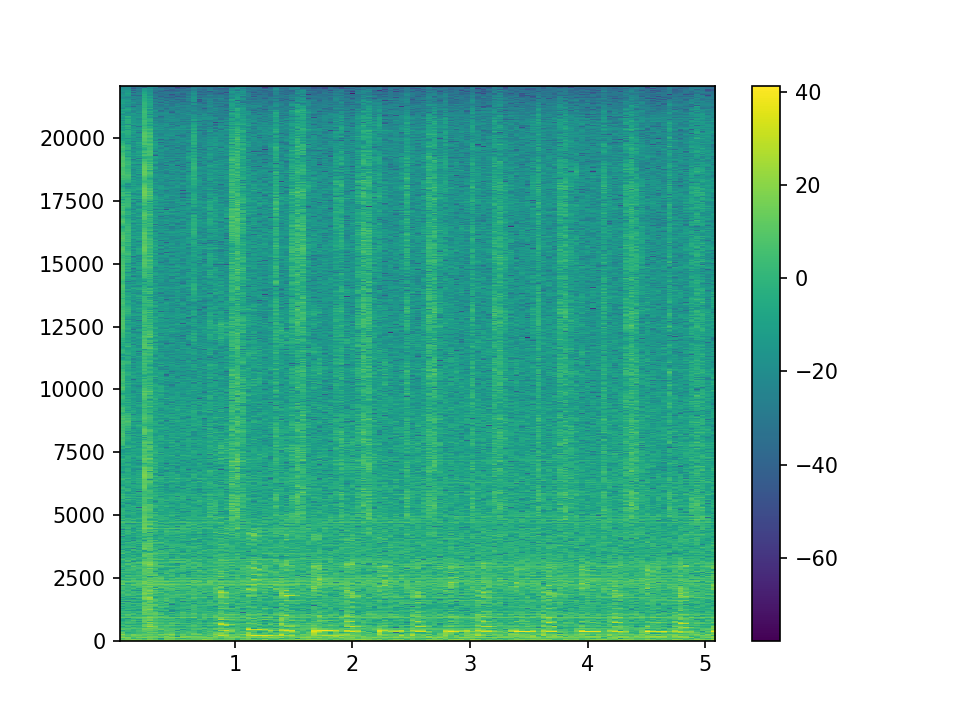

In [6]:
fig, ax = plt.subplots()
S, freqs, times, im = ax.specgram(decoded, NFFT=4096, Fs=44100,
                                 window=mlab.window_hanning,
                                 noverlap=(4096 // 2))
fig.colorbar(im)

<IPython.core.display.Javascript object>


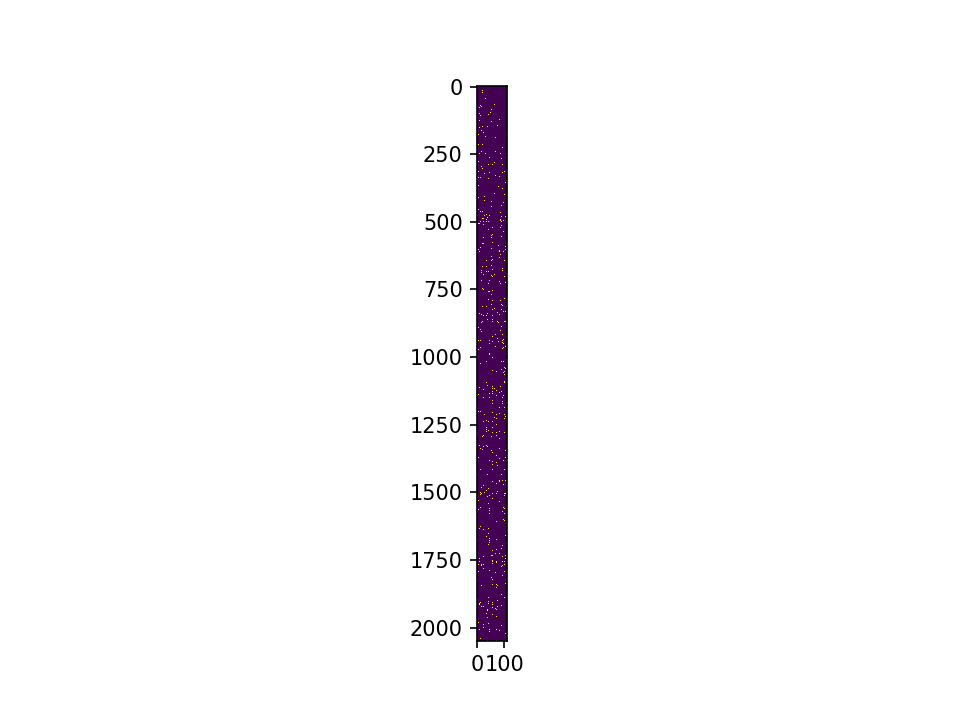

In [36]:
peaks, data, fig, ax = plot_compare(S, local_peaks)

In [12]:

import pyaudio
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion 
from scipy.ndimage.morphology import iterate_structure

# Constants
FORMAT = pyaudio.paInt16
SF = 44100
FRAME_SIZE = 1024
NO_FRAMES = 440


def record(secs, format=FORMAT, sampling_frequency=SF, frame_size=FRAME_SIZE, nframes=NO_FRAMES):
    p = pyaudio.PyAudio()
    print('Recording for', secs, 'seconds')

    stream = p.open(format=format,
                    channels=1,
                    rate=sampling_frequency,
                    input=True,
                    frames_per_buffer=frame_size) # frames_per_buffer refers to a number of sample frames

    data = stream.read(nframes * frame_size)
    print('Done recording.')
    stream.stop_stream()
    stream.close()
    p.terminate()

    return np.fromstring(data, 'Int16')


def spectrogram(decoded):
    fig, ax = plt.subplots()
    S, freqs, times, im = ax.specgram(decoded, NFFT=4096, Fs=44100,
                                     window=mlab.window_hanning,
                                     noverlap=(4096 // 2))
    return S


def get_recording(seconds):
    samples = record(seconds)
    return spectrogram(samples), samples

recording = record(10)

Recording for 10 seconds
Done recording.


TypeError: unorderable types: NoneType() <= int()

<IPython.core.display.Javascript object>


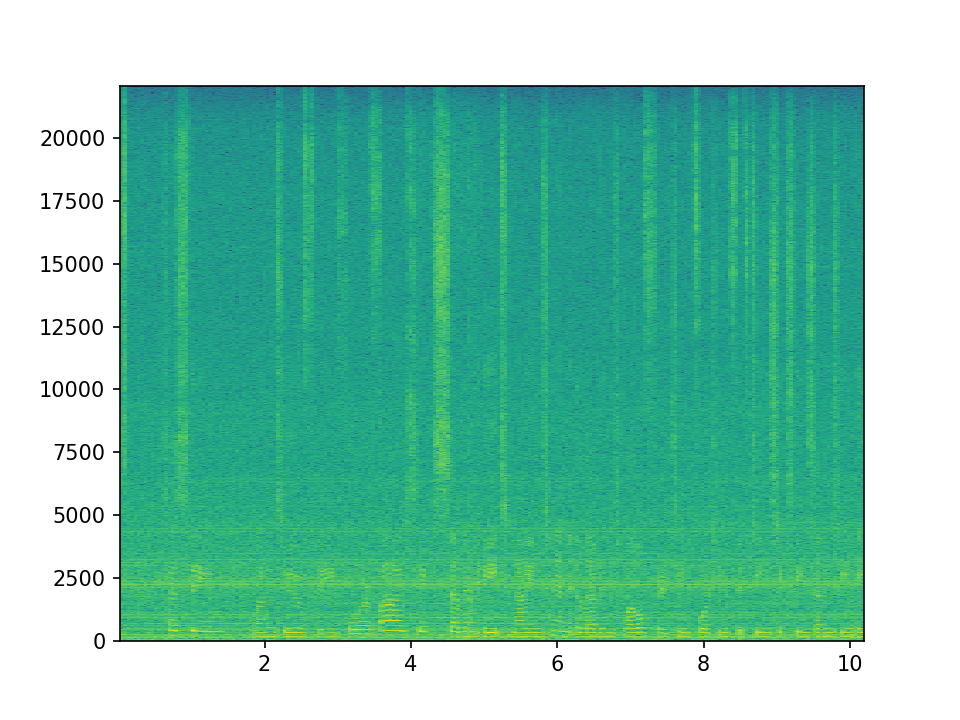

array([[  6.17402855e+01,   7.64557214e+01,   1.10160194e+00, ...,
          3.67763821e-02,   4.18114695e+01,   1.08403440e+01],
       [  8.95691737e+01,   4.84326868e+01,   2.92032468e+02, ...,
          3.58755886e+01,   5.53631323e+01,   3.63676475e+01],
       [  7.78411441e+00,   6.39448760e+02,   3.54415316e+02, ...,
          3.10099590e+02,   1.04219070e+02,   1.38623804e-01],
       ..., 
       [  4.71302073e-02,   3.38900972e-01,   1.44024402e-04, ...,
          4.50233288e-05,   2.84114055e-04,   9.46075891e-04],
       [  3.45296957e-02,   2.38738341e-01,   8.22993456e-04, ...,
          1.66822126e-04,   2.24098781e-04,   3.11506775e-04],
       [  1.25714464e-02,   7.74259981e-02,   1.39542096e-03, ...,
          4.22778173e-05,   2.21534034e-04,   7.00095570e-06]])

In [14]:
spectrogram(recording)